In [5]:
pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install openpyxl

     |████████████████████████████████| 249 kB 10.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# raisin = fetch_ucirepo(id=850)

# # data (as pandas dataframes)
# X = raisin.data.features
# y = raisin.data.targets

# # metadata
# print(raisin.metadata)

# # variable information
print(raisin.variables)


{'uci_id': 850, 'name': 'Raisin', 'repository_url': 'https://archive.ics.uci.edu/dataset/850/raisin', 'data_url': 'https://archive.ics.uci.edu/static/public/850/data.csv', 'abstract': 'Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 900, 'num_features': 7, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5660T', 'creators': ['İ̇lkay Çinar', 'Murat Koklu', 'Sakir Tasdemir'], 'intro_paper': {'title': 'Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması', 'authors': 'İ̇lkay Çinar, Murat Koklu, Sakir Tasdemir

In [18]:
# data_url = "https://archive.ics.uci.edu/dataset/850/raisin"
# columns = ["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea","Extent","Perimeter","Class"]
# df = pd.read_csv(data_url,names=columns)

df = pd.read_excel("/home/6b1/Desktop/084/Raisin_Dataset/Raisin_Dataset.xlsx")

In [26]:
print(df.head())  
print(df.info())  
print(df.describe())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non

In [19]:
missing_values = df.isnull().sum()

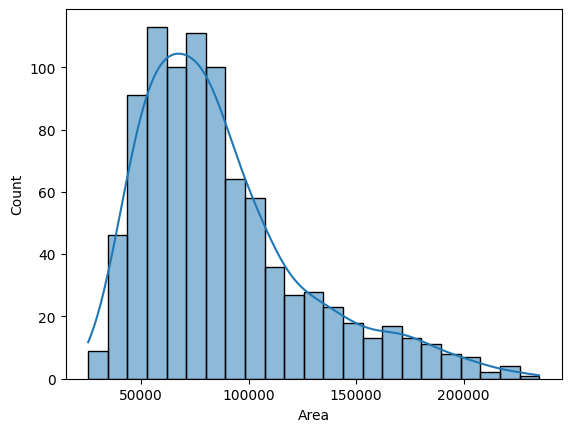

In [21]:
sns.histplot(df["Area"], kde=True)
plt.show()

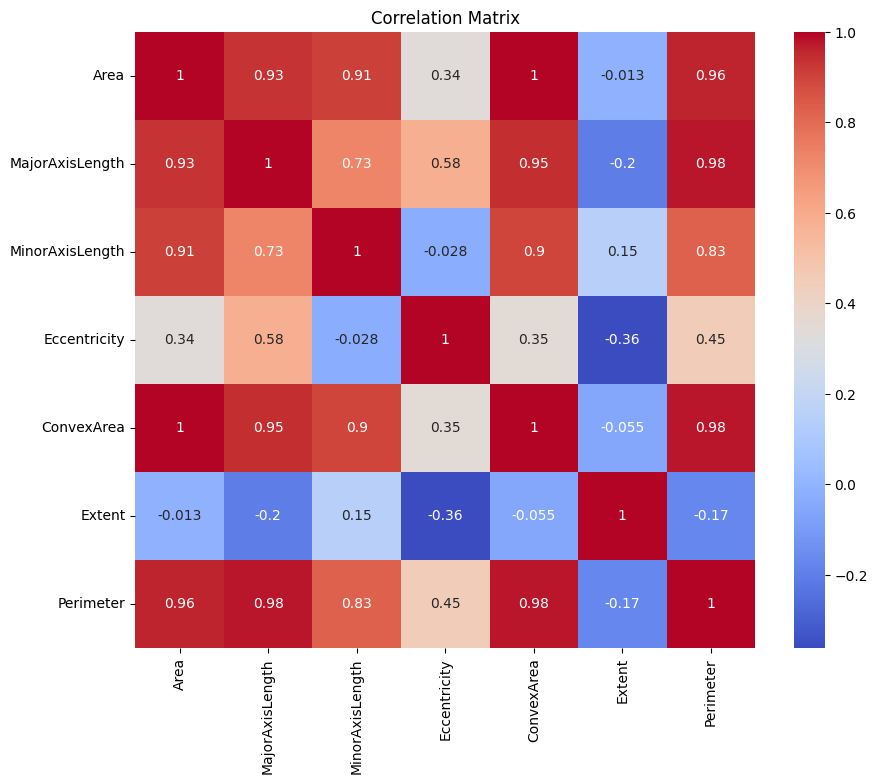

In [34]:
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
# plt.show()
# Exclude non-numeric columns ('Variety')
numeric_df = df.drop(columns=['Class'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [36]:
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Initialize the models
lr_model = LogisticRegression(max_iter=1000)
mlp_model = MLPClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()
nb_model = GaussianNB()

# Fit the models
lr_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

GaussianNB()

In [38]:
lr_score = lr_model.score(X_test, y_test)
mlp_score = mlp_model.score(X_test, y_test)
knn_score = knn_model.score(X_test, y_test)
svm_score = svm_model.score(X_test, y_test)
nb_score = nb_model.score(X_test, y_test)

In [39]:
print("Logistic Regression Score:", lr_score)
print("MLP Score:", mlp_score)
print("KNN Score:", knn_score)
print("SVM Score:", svm_score)
print("Naive Bayes Score:", nb_score)

Logistic Regression Score: 0.85
MLP Score: 0.5555555555555556
KNN Score: 0.8444444444444444
SVM Score: 0.85
Naive Bayes Score: 0.8277777777777777


In [41]:
from sklearn.cluster import KMeans

X_cluster = df.drop("Class", axis=1)

# Initialize the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(X_cluster)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for clustering: 0.6541271799814119


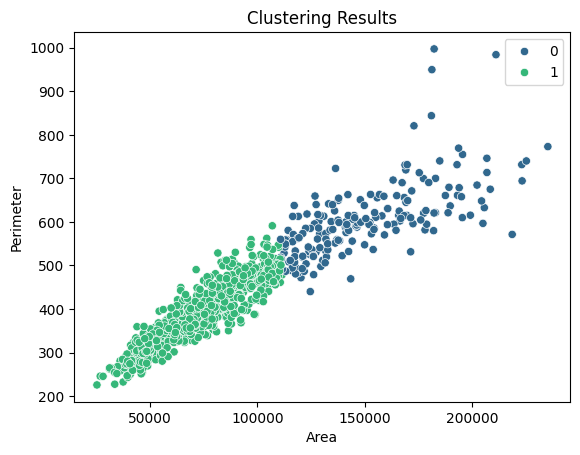

In [42]:
# Step 10: Ignore the class label and perform clustering task
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare the data by removing the class labels
X_cluster = df.drop(['Class'], axis=1)

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters
kmeans.fit(X_cluster)
cluster_labels = kmeans.labels_

# Measure the performance of the clustering model using silhouette score
silhouette_avg = silhouette_score(X_cluster, cluster_labels)
print(f"Silhouette Score for clustering: {silhouette_avg}")

# Optionally, visualize the clustering results
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=X_cluster.iloc[:, 0], y=X_cluster.iloc[:, 1], hue=cluster_labels, palette='viridis')
plt.title("Clustering Results")
plt.xlabel("Area")
plt.ylabel("Perimeter")
plt.show()


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
lr_pred = lr_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
nb_pred = nb_model.predict(X_test)

# Define the positive label
pos_label = 'Kecimen'

# Accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)

# Precision
lr_precision = precision_score(y_test, lr_pred, pos_label=pos_label)
mlp_precision = precision_score(y_test, mlp_pred, pos_label=pos_label)
knn_precision = precision_score(y_test, knn_pred, pos_label=pos_label)
svm_precision = precision_score(y_test, svm_pred, pos_label=pos_label)
nb_precision = precision_score(y_test, nb_pred, pos_label=pos_label)

# Recall
lr_recall = recall_score(y_test, lr_pred, pos_label=pos_label)
mlp_recall = recall_score(y_test, mlp_pred, pos_label=pos_label)
knn_recall = recall_score(y_test, knn_pred, pos_label=pos_label)
svm_recall = recall_score(y_test, svm_pred, pos_label=pos_label)
nb_recall = recall_score(y_test, nb_pred, pos_label=pos_label)

# F1-score
lr_f1 = f1_score(y_test, lr_pred, pos_label=pos_label)
mlp_f1 = f1_score(y_test, mlp_pred, pos_label=pos_label)
knn_f1 = f1_score(y_test, knn_pred, pos_label=pos_label)
svm_f1 = f1_score(y_test, svm_pred, pos_label=pos_label)
nb_f1 = f1_score(y_test, nb_pred, pos_label=pos_label)

# Printing the results
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)
print()

print("MLP Classifier:")
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1 Score:", mlp_f1)
print()

print("KNN Classifier:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print()

print("SVM Classifier:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print()

print("Naive Bayes Classifier:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)


Logistic Regression:
Accuracy: 0.85
Precision: 0.8681318681318682
Recall: 0.8404255319148937
F1 Score: 0.8540540540540541

MLP Classifier:
Accuracy: 0.7388888888888889
Precision: 0.8309859154929577
Recall: 0.6276595744680851
F1 Score: 0.7151515151515151

KNN Classifier:
Accuracy: 0.8444444444444444
Precision: 0.84375
Recall: 0.8617021276595744
F1 Score: 0.8526315789473684

SVM Classifier:
Accuracy: 0.85
Precision: 0.8252427184466019
Recall: 0.9042553191489362
F1 Score: 0.8629441624365481

Naive Bayes Classifier:
Accuracy: 0.8277777777777777
Precision: 0.7889908256880734
Recall: 0.9148936170212766
F1 Score: 0.8472906403940887


ROC CURVE

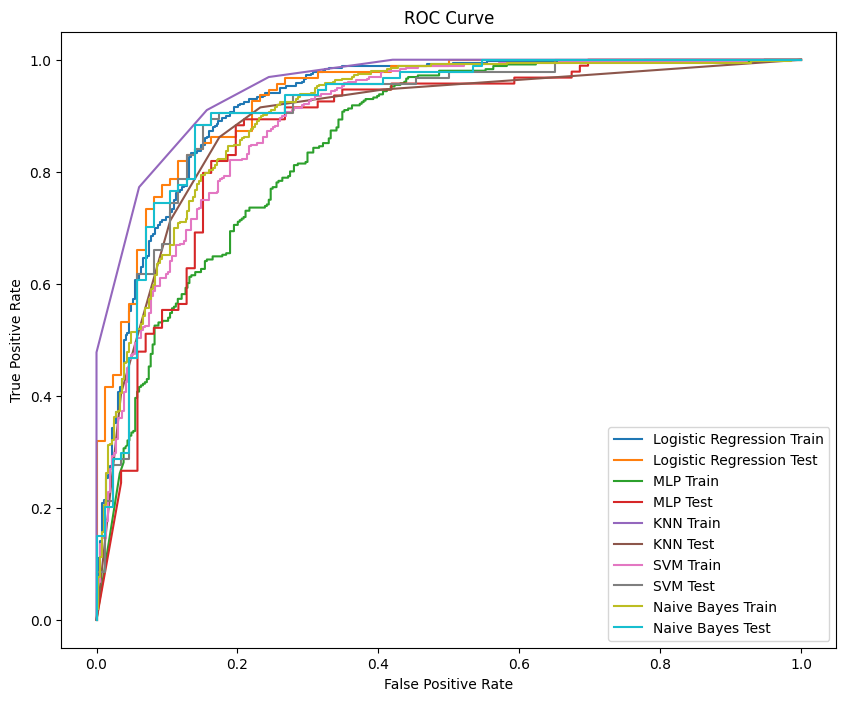

In [50]:
# Convert categorical labels to binary labels
y_train_binary = y_train.map({'Kecimen': 1, 'Besni': 0})
y_test_binary = y_test.map({'Kecimen': 1, 'Besni': 0})

# Calculate ROC curve and ROC AUC for each model with binary labels
lr_train_prob = lr_model.predict_proba(X_train)[:, 1]
lr_test_prob = lr_model.predict_proba(X_test)[:, 1]

mlp_train_prob = mlp_model.predict_proba(X_train)[:, 1]
mlp_test_prob = mlp_model.predict_proba(X_test)[:, 1]

knn_train_prob = knn_model.predict_proba(X_train)[:, 1]
knn_test_prob = knn_model.predict_proba(X_test)[:, 1]

svm_train_prob = svm_model.decision_function(X_train)
svm_test_prob = svm_model.decision_function(X_test)

nb_train_prob = nb_model.predict_proba(X_train)[:, 1]
nb_test_prob = nb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC AUC for each model
lr_train_fpr, lr_train_tpr, _ = roc_curve(y_train_binary, lr_train_prob)
lr_test_fpr, lr_test_tpr, _ = roc_curve(y_test_binary, lr_test_prob)

mlp_train_fpr, mlp_train_tpr, _ = roc_curve(y_train_binary, mlp_train_prob)
mlp_test_fpr, mlp_test_tpr, _ = roc_curve(y_test_binary, mlp_test_prob)

knn_train_fpr, knn_train_tpr, _ = roc_curve(y_train_binary, knn_train_prob)
knn_test_fpr, knn_test_tpr, _ = roc_curve(y_test_binary, knn_test_prob)

svm_train_fpr, svm_train_tpr, _ = roc_curve(y_train_binary, svm_train_prob)
svm_test_fpr, svm_test_tpr, _ = roc_curve(y_test_binary, svm_test_prob)

nb_train_fpr, nb_train_tpr, _ = roc_curve(y_train_binary, nb_train_prob)
nb_test_fpr, nb_test_tpr, _ = roc_curve(y_test_binary, nb_test_prob)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(lr_train_fpr, lr_train_tpr, label="Logistic Regression Train")
plt.plot(lr_test_fpr, lr_test_tpr, label="Logistic Regression Test")

plt.plot(mlp_train_fpr, mlp_train_tpr, label="MLP Train")
plt.plot(mlp_test_fpr, mlp_test_tpr, label="MLP Test")

plt.plot(knn_train_fpr, knn_train_tpr, label="KNN Train")
plt.plot(knn_test_fpr, knn_test_tpr, label="KNN Test")

plt.plot(svm_train_fpr, svm_train_tpr, label="SVM Train")
plt.plot(svm_test_fpr, svm_test_tpr, label="SVM Test")

plt.plot(nb_train_fpr, nb_train_tpr, label="Naive Bayes Train")
plt.plot(nb_test_fpr, nb_test_tpr, label="Naive Bayes Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# SVM Model is best fit for this data with an Accuracy Score 
SVM Classifier:

Accuracy: 0.85

Precision: 0.8252427184466019

Recall: 0.9042553191489362

F1 Score: 0.8629441624365481
